In [1]:
### Data Collection
import pandas_datareader as pdr
key="e2e933138d72c4317d25713288f904bda903b4bc"

In [2]:
df = pdr.get_data_tiingo('TSLA', api_key=key)


C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('TSLA.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('TSLA.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2018-08-27 00:00:00+00:00,319.27,322.44,308.81,318.00,13079288,21.284667,21.496000,20.587333,21.200000,196189320,0.0,1.0
1,TSLA,2018-08-28 00:00:00+00:00,311.86,318.88,311.19,318.41,7649091,20.790667,21.258667,20.746000,21.227333,114736365,0.0,1.0
2,TSLA,2018-08-29 00:00:00+00:00,305.01,311.85,303.69,310.27,7447392,20.334000,20.790000,20.246000,20.684667,111710880,0.0,1.0
3,TSLA,2018-08-30 00:00:00+00:00,303.15,304.60,297.72,302.26,7216706,20.210000,20.306667,19.848000,20.150667,108250590,0.0,1.0
4,TSLA,2018-08-31 00:00:00+00:00,301.66,305.31,298.60,302.00,5375104,20.110667,20.354000,19.906667,20.133333,80626560,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,TSLA,2023-08-17 00:00:00+00:00,219.22,226.7400,218.83,226.0600,120718417,219.22,226.7400,218.83,226.0600,120718417,0.0,1.0
1252,TSLA,2023-08-18 00:00:00+00:00,215.49,217.5800,212.36,214.1200,136276584,215.49,217.5800,212.36,214.1200,136276584,0.0,1.0
1253,TSLA,2023-08-21 00:00:00+00:00,231.28,232.1343,220.58,221.5512,135702671,231.28,232.1343,220.58,221.5512,135702671,0.0,1.0
1254,TSLA,2023-08-22 00:00:00+00:00,233.19,240.8200,229.55,240.2500,130597886,233.19,240.8200,229.55,240.2500,130597886,0.0,1.0
1255,TSLA,2023-08-23 00:00:00+00:00,236.86,238.9800,229.29,229.3400,101077635,236.86,238.9800,229.29,229.3400,101077635,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       319.27
1       311.86
2       305.01
3       303.15
4       301.66
         ...  
1251    219.22
1252    215.49
1253    231.28
1254    233.19
1255    236.86
Name: close, Length: 1256, dtype: float64

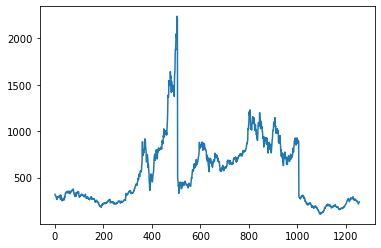

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np


In [12]:
df1

0       319.27
1       311.86
2       305.01
3       303.15
4       301.66
         ...  
1251    219.22
1252    215.49
1253    231.28
1254    233.19
1255    236.86
Name: close, Length: 1256, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.0991106 ]
 [0.09563279]
 [0.09241781]
 ...
 [0.05781334]
 [0.05870978]
 [0.06043226]]


In [15]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(816, 440)

In [17]:
train_data

array([[0.0991106 ],
       [0.09563279],
       [0.09241781],
       [0.09154483],
       [0.09084552],
       [0.0848802 ],
       [0.08102692],
       [0.08112548],
       [0.07281346],
       [0.08326098],
       [0.08041677],
       [0.08562645],
       [0.08511956],
       [0.08781358],
       [0.08764462],
       [0.08300753],
       [0.08960646],
       [0.08928261],
       [0.08964401],
       [0.08991622],
       [0.09053106],
       [0.09456269],
       [0.09359585],
       [0.07353155],
       [0.09508835],
       [0.09054514],
       [0.08762584],
       [0.0815385 ],
       [0.07220801],
       [0.06686223],
       [0.07260695],
       [0.06982846],
       [0.06764602],
       [0.0707202 ],
       [0.07110037],
       [0.07907915],
       [0.07682163],
       [0.07312792],
       [0.0712928 ],
       [0.07173867],
       [0.08731608],
       [0.084669  ],
       [0.09704081],
       [0.10456903],
       [0.10642292],
       [0.10409969],
       [0.10758219],
       [0.110

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)


(339, 100)
(339,)


(None, None)

In [22]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 8s 256ms/step - loss: 0.0365 - val_loss: 0.0095
Epoch 2/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0129 - val_loss: 0.0080
Epoch 3/100
12/12 [==============================] - 2s 171ms/step - loss: 0.0087 - val_loss: 0.0025
Epoch 4/100
12/12 [==============================] - 2s 164ms/step - loss: 0.0086 - val_loss: 0.0026
Epoch 5/100
12/12 [==============================] - 3s 220ms/step - loss: 0.0068 - val_loss: 0.0028
Epoch 6/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0067 - val_loss: 0.0027
Epoch 7/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0060 - val_loss: 0.0017
Epoch 8/100
12/12 [==============================] - 2s 206ms/step - loss: 0.0056 - val_loss: 0.0016
Epoch 9/100
12/12 [==============================] - 3s 214ms/step - loss: 0.0055 - val_loss: 0.0017
Epoch 10/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0054 - val_lo

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.13.0'

In [30]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 24ms/step


In [31]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

682.3830486212837

In [33]:
math.sqrt(mean_squared_error(ytest,test_predict))

466.4661377108607

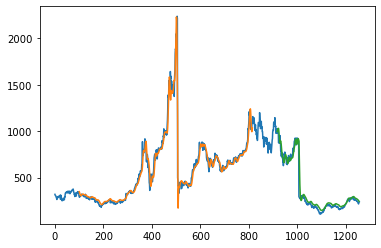

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

440

In [36]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.040677727454063325,
 0.039649872104756775,
 0.03633632928918405,
 0.036120432731795465,
 0.03586229554361345,
 0.036932391523713415,
 0.03399901438528148,
 0.03651467861920071,
 0.03609227231126652,
 0.0370497266092507,
 0.035768427475183634,
 0.03402248140238895,
 0.025762091380564622,
 0.026743012695656265,
 0.025555581630019017,
 0.02467322178677868,
 0.021425386619106854,
 0.02444793842254711,
 0.02638162063220144,
 0.025217656583671658,
 0.024504259263605013,
 0.02464506136624975,
 0.024921972168117715,
 0.029080327599558822,
 0.02989228639147677,
 0.02865322788820314,
 0.028366930279492178,
 0.03002839509070003,
 0.02810409968788867,
 0.027339074930185628,
 0.027418862788350984,
 0.030863820899725447,
 0.03228592213643723,
 0.03381127824842184,
 0.03790861943538357,
 0.036453664374721334,
 0.03510665759275339,
 0.035843521929927485,
 0.03992678290662474,
 0.04367681224039613,
 0.044976884988149154,
 0.04666181681646446,
 0.04968906202332622,
 0.05139746086874898,
 0.0531340201

In [42]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)
     


0 day input [0.03086382 0.03228592 0.03381128 0.03790862 0.03645366 0.03510666
 0.03584352 0.03992678 0.04367681 0.04497688 0.04666182 0.04968906
 0.05139746 0.05313402 0.05466407 0.05949358 0.06397109 0.06651961
 0.07068735 0.06978622 0.0693685  0.07154624 0.07807477 0.07103935
 0.07345646 0.06969704 0.0623988  0.06669796 0.06952808 0.07011945
 0.07212353 0.08059512 0.08184357 0.07905569 0.07806538 0.07580316
 0.07588764 0.07692019 0.07969399 0.08132729 0.08555136 0.0869406
 0.08596438 0.07265388 0.07130218 0.07554502 0.07377091 0.07333443
 0.06927933 0.07431535 0.07478    0.07179499 0.06852838 0.07097365
 0.06841105 0.06727994 0.06645859 0.06293385 0.06441227 0.06314974
 0.06179335 0.05860184 0.05514749 0.0521531  0.05040246 0.05781334
 0.05870978 0.06043226 0.06340127 0.06340127 0.06545167 0.06702971
 0.06876984 0.07057483 0.07239028 0.07419015 0.07596408 0.07770897
 0.07942426 0.08110995 0.08276567 0.08439066 0.08598395 0.08754437
 0.0890708  0.09056216 0.09201753 0.0934361  0.0948

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
import matplotlib.pyplot as plt

In [45]:
len(df1)

1256

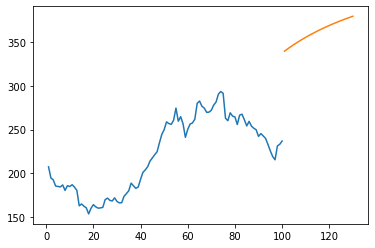

In [46]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

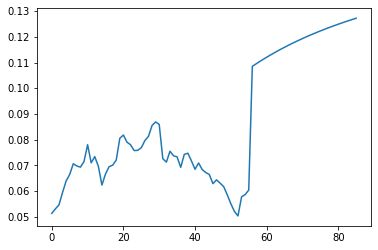

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [48]:
df3=scaler.inverse_transform(df3).tolist()

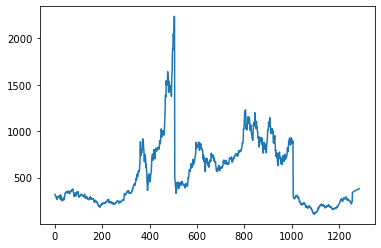

In [49]:
plt.plot(df3)